# Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

# Data Collection And Analysis

In [2]:
df = pd.read_csv('C:\Users\Avinash\OneDrive\Desktop\movie\WaterPotability/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df['ph'].fillna(df['ph']. mode(),inplace=True)

df['Sulfate'].fillna(df['Sulfate'].mode(),inplace=True)

df['Trihalomethanes'].fillna(df['Trihalomethanes'].mode(),inplace=True)

In [6]:
x_df = df.dropna(how='any')

In [7]:
df.drop_duplicates()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,180.206746,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,182.397370,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [8]:
x_df['Potability'].value_counts()

0    1853
1    1173
Name: Potability, dtype: int64

In [9]:
x_df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.036137,196.599623,21747.336129,7.091205,333.425487,426.851387,14.354231,66.258640,3.961783
1,7.104382,195.684396,22293.939533,7.166222,333.559768,424.104977,14.223227,66.418421,3.981792


In [10]:
correlation = x_df.corr()
print(correlation)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.073546 -0.072102    -0.026261  0.063919   
Hardness         0.073546  1.000000 -0.043753    -0.007834 -0.107853   
Solids          -0.072102 -0.043753  1.000000    -0.075168 -0.133952   
Chloramines     -0.026261 -0.007834 -0.075168     1.000000  0.019461   
Sulfate          0.063919 -0.107853 -0.133952     0.019461  1.000000   
Conductivity     0.011440 -0.010009  0.007726    -0.026439 -0.017806   
Organic_carbon   0.029681  0.004045  0.010430    -0.012763  0.017272   
Trihalomethanes  0.008028 -0.009534 -0.003948     0.020067 -0.012869   
Turbidity       -0.034639 -0.025290  0.017453     0.005258 -0.004721   
Potability       0.021105 -0.013547  0.030630     0.022761  0.001577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.011440        0.029681         0.008028  -0.034639   
Hardness            -0.010009        0.004045        

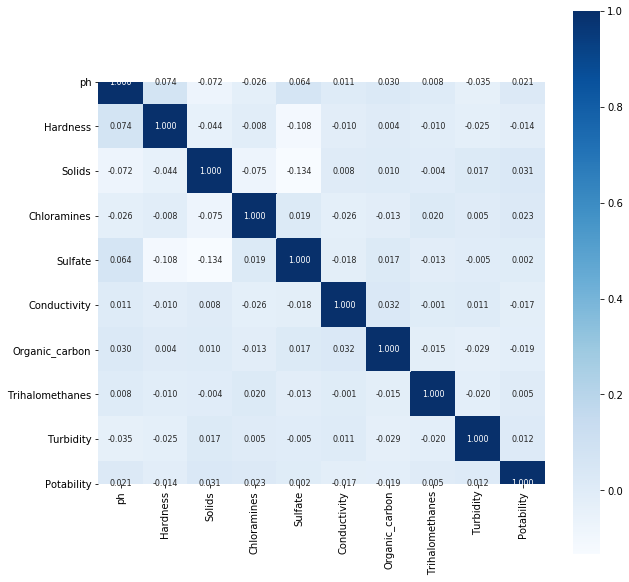

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.3f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
x_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
Y = x_df['Potability'] 
X = x_df.drop(columns = 'Potability' , axis = 1)

In [14]:
print(X)

             ph    Hardness        Solids  Chloramines     Sulfate  \
0      0.000000  204.890455  20791.318981     7.300212  368.516441   
1      3.716080  129.422921  18630.057858     6.635246  180.206746   
2      8.099124  224.236259  19909.541732     9.275884  182.397370   
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.1

In [15]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 3026, dtype: int64


# Data Standardization

# Spiltting

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y, random_state=4)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2420, 9) (606, 9) (2420,) (606,)


# Training Model

In [17]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Evaluation

In [18]:
#accuracy score of the model
x_train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(x_train_prediction, Y_train)
print("Accuracy score : ", train_accuracy)

Accuracy score :  0.9859504132231405


# Predictive system

In [20]:
input = (7.08,169.46,29846.719,5.44,350.40,353.03,18.959,30.38,3.48) 
 
#change to numpy array  
input_as_numpy = np.asarray(input) 

#reshape array 
input_reshaped = input_as_numpy.reshape(1,-1) 

prediction = model.predict(input_reshaped) 

print(prediction) 
if (prediction[0]==0): 
  print("water is not potable") 
else :
  print("water is potable")

[0]
water is not potable


# Saving the trained model

In [21]:
import pickle

In [22]:
filename = 'model_trained.sav'
pickle.dump(model, open(filename, 'wb'))

In [23]:
# loading the saved model
loaded_model=pickle.load(open('model_trained.sav', 'rb'))

In [24]:
input = (7.08,169.46,29846.719,5.44,350.40,353.03,18.959,30.38,3.48) 
 
#change to numpy array  
input_as_numpy = np.asarray(input) 

#reshape array 
input_reshaped = input_as_numpy.reshape(1,-1) 

prediction = loaded_model.predict(input_reshaped) 

print(prediction) 
if (prediction[0]==0): 
  print("water is not potable") 
else :
  print("water is potable")

[0]
water is not potable
